In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/in'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/Admin/Downloads/in\salesdaily.csv
C:/Users/Admin/Downloads/in\saleshourly.csv
C:/Users/Admin/Downloads/in\salesmonthly.csv
C:/Users/Admin/Downloads/in\salesweekly.csv


In [14]:
nRow = 2000 #'None' to read entire file
df = pd.read_csv('C:/Users/Admin/Downloads/in/saleshourly.csv', delimiter=',', nrows = nRow)
df.dataframeName = 'saleshourly.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2000 rows and 13 columns


In [15]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014 8:00,0.0,0.67,0.4,2.0,0,0,0,1.0,2014,1,8,Thursday
1,1/2/2014 9:00,0.0,0.00,1.0,0.0,2,0,0,0.0,2014,1,9,Thursday
2,1/2/2014 10:00,0.0,0.00,0.0,3.0,2,0,0,0.0,2014,1,10,Thursday
3,1/2/2014 11:00,0.0,0.00,0.0,2.0,1,0,0,0.0,2014,1,11,Thursday
4,1/2/2014 12:00,0.0,2.00,0.0,5.0,2,0,0,0.0,2014,1,12,Thursday


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2000 non-null   object 
 1   M01AB         2000 non-null   float64
 2   M01AE         2000 non-null   float64
 3   N02BA         2000 non-null   float64
 4   N02BE         2000 non-null   float64
 5   N05B          2000 non-null   int64  
 6   N05C          2000 non-null   int64  
 7   R03           2000 non-null   int64  
 8   R06           2000 non-null   float64
 9   Year          2000 non-null   int64  
 10  Month         2000 non-null   int64  
 11  Hour          2000 non-null   int64  
 12  Weekday Name  2000 non-null   object 
dtypes: float64(5), int64(6), object(2)
memory usage: 203.2+ KB


In [17]:
df.isnull().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

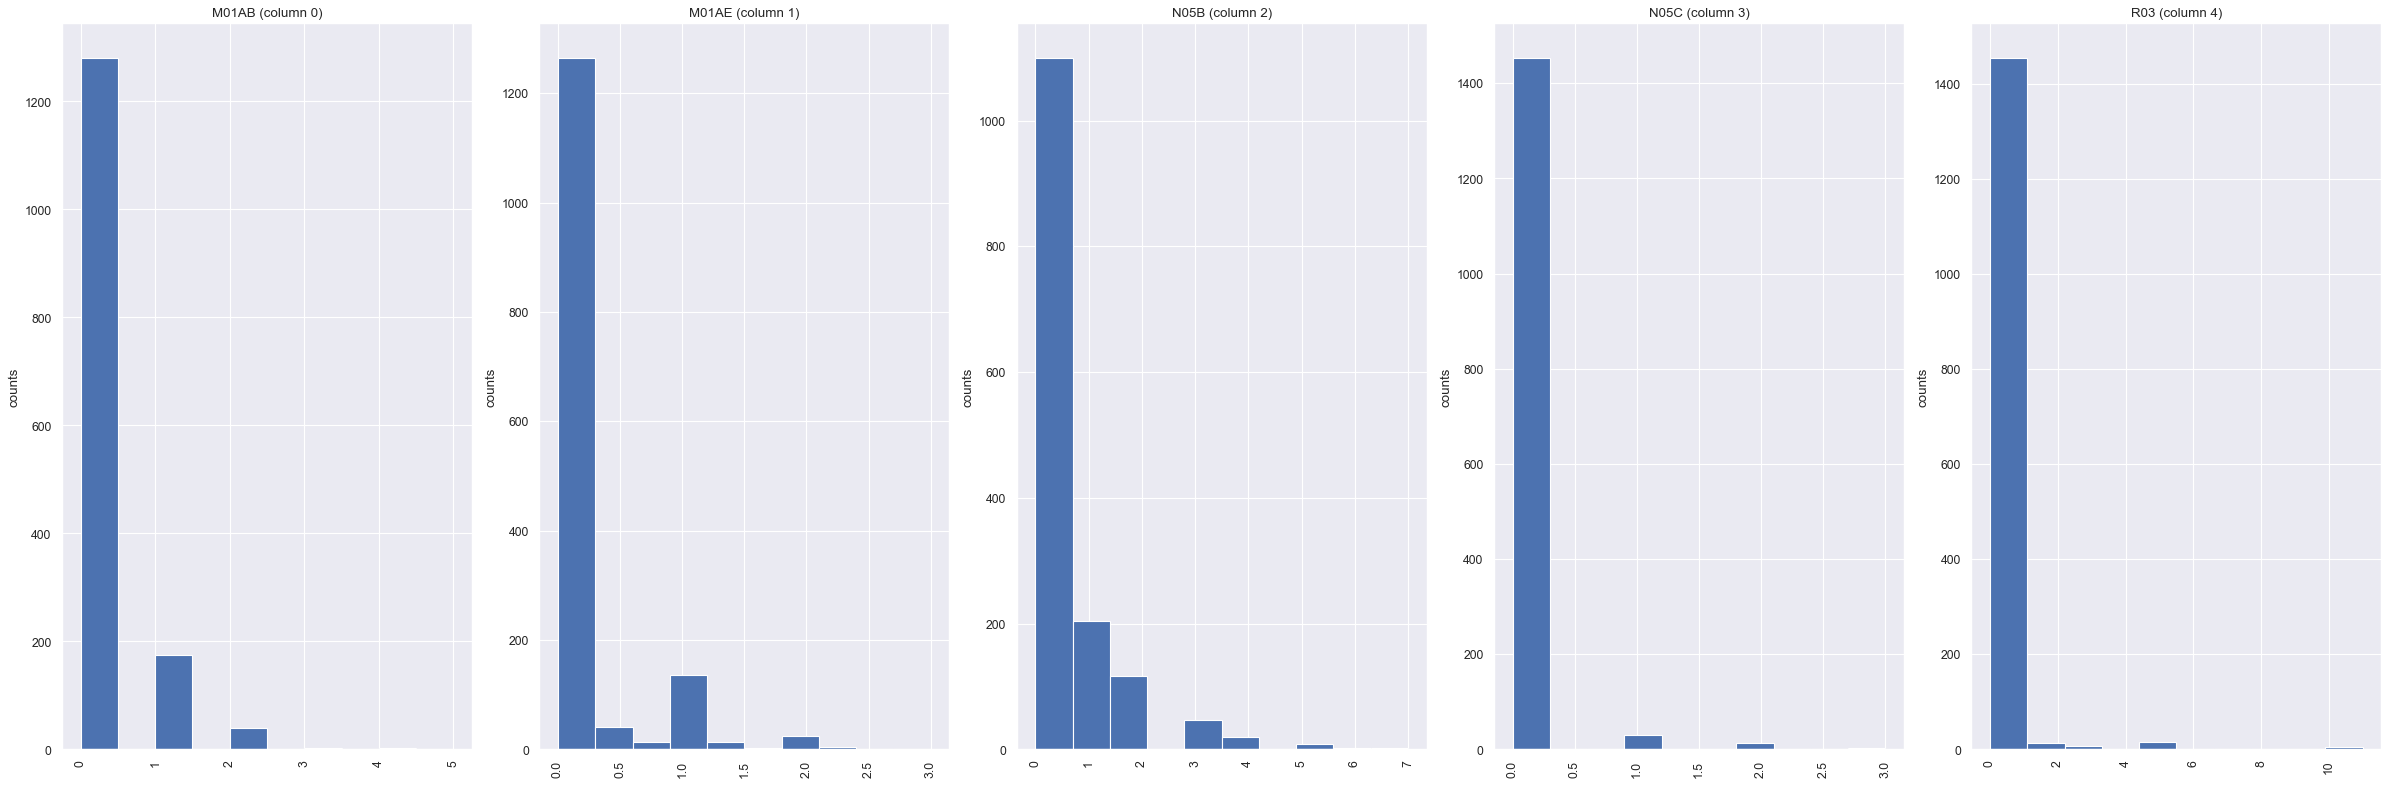

In [30]:
plotPerColumnDistribution(df1, 5, 5)

In [29]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 20]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [24]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [27]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

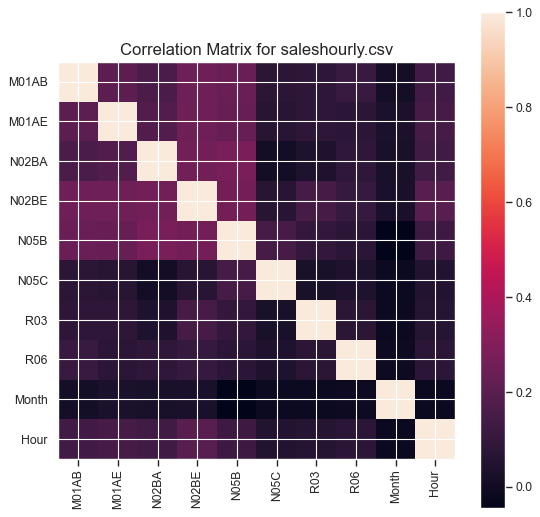

In [25]:
plotCorrelationMatrix(df1, 8)

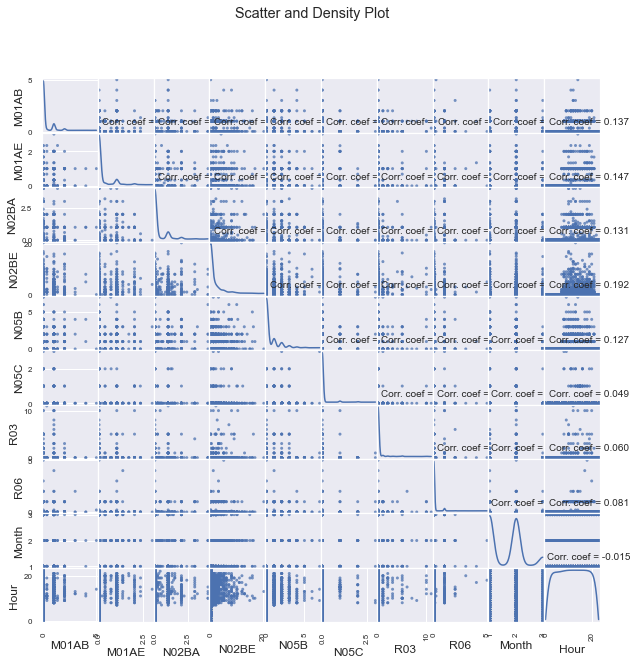

In [37]:
plotScatterMatrix(df1, 10, 10)

In [75]:
dfSplit = df[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

In [1]:
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt
# Re - regular expression module for Python
import re
# Calendar - Python functions related to the calendar
import calendar

# Manipulating dates and times for Python
from datetime import datetime

# Scikit-learn algorithms and functions
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline

# Additional configuration
np.set_printoptions(precision=2)

In [2]:
def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

In [3]:
def predictLinearRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Linear Regression')

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Linear regressor')
    plt.legend()
    plt.show()

    # LINEAR REGRESSION - Predict/Test model
    y_predict_linear = reg.predict(X_test)
 # LINEAR REGRESSION - Predict for January 2020
    linear_predict = reg.predict([[predictFor]])
    # linear_predict = reg.predict([[predictFor]])[0]

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_train, y_train)

    # LINEAR REGRESSION - Error
    # error = round(np.mean((y_predict_linear-y_test)**2), 2)
    
    # Results
    print('Linear Regression: ' + str(linear_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')

    return {'regressor':reg, 'values':linear_predict}

In [4]:
def predictPolynomialRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Polynomial Regression')
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg_model = linear_model.LinearRegression()
    poly_reg_model.fit(X_poly, y_train)
    plt.plot(X_train, poly_reg_model.predict(poly_reg.fit_transform(X_train)), color='green', label='Polynomial regressor')
    plt.legend()
    plt.show()

    # Polynomial Regression - Predict/Test model
    y_predict_polynomial = poly_reg_model.predict(X_poly)

    # Polynomial Regression - Predict for January 2020
    polynomial_predict = poly_reg_model.predict(poly_reg.fit_transform([[predictFor]]))

    # Polynomial Regression - Accuracy
    # X_poly_test = poly_reg.fit_transform(X_test)
    accuracy = poly_reg_model.score(X_poly, y_train)

    # Polynomial Regression - Error
    # error = round(np.mean((y_predict_polynomial-y_train)**2), 2)
       # Result
    print('Polynomial Regression: ' + str(polynomial_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':poly_reg_model, 'values':polynomial_predict}

In [5]:
def predictSVR(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Support Vector Regression (SVR)')

    svr_regressor = SVR(kernel='rbf', gamma='auto')
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # Simple Vector Regression (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # Simple Vector Regression (SVR) - Predict for January 2020
    svr_predict = svr_regressor.predict([[predictFor]])

    # Simple Vector Regression (SVR) - Accuracy
    accuracy = svr_regressor.score(X_train, y_train)

    # Simple Vector Regression (SVR) - Error
    # error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    print('Support Vector Regression (SVR): ' + str(svr_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':svr_regressor, 'values':svr_predict}

In [30]:
product = 'N02BA'

# For storing all regression results
regResults = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product])

# To display a larger graph than a default with specify some additional parameters for Matplotlib library.
rcParams['figure.figsize'] = 12, 8

# We will be using monthly data for our predictions
df = pd.read_csv("C:/Users/Admin/Downloads/in/salesmonthly.csv")

# We will use monthly sales data from 2014-2019.
df = df.loc[df['datum'].str.contains("2014") | df['datum'].str.contains("2015") | df['datum'].str.contains("2016") | df['datum'].str.contains("2017") | df['datum'].str.contains("2018") | df['datum'].str.contains("2019")]
df = df.reset_index()

In [31]:
df.head()

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [32]:
df['datumNumber'] = 1
for index, row in df.iterrows():
    df.loc[index, 'datumNumber'] = index+1

In [33]:
# The first and the last available month is quite low which may indicate that it might be incomplete
# and skewing results so we're dropping it
df.drop(df.head(1).index,inplace=True)
df.drop(df.tail(1).index,inplace=True)

In [34]:
df = df[df[product] != 0]

In [35]:
df.head()

,index,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,datumNumber
1,1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2
2,2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3
3,3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,4
4,4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,5
5,5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3,6


In [36]:
predictFor = len(df)+5
print('Predictions for the product ' + str(product) + ' sales in January 2020')

Predictions for the product N02BA sales in January 2020


In [37]:
regValues = {}

In [38]:
dfSplit = df[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values

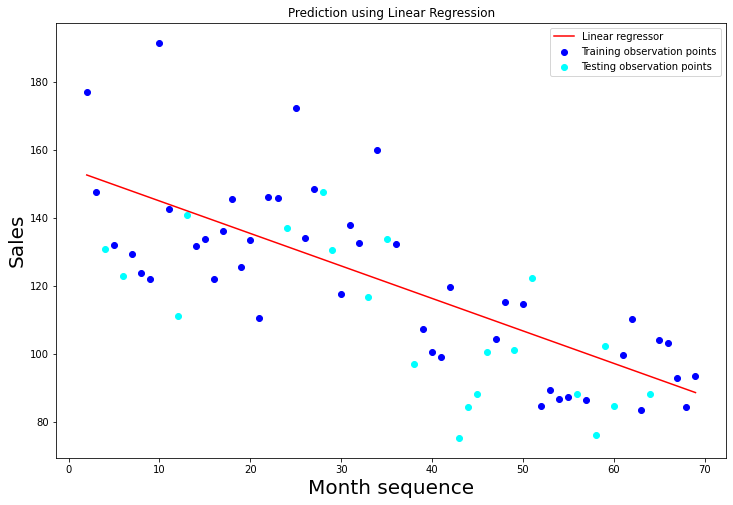

Linear Regression: [[85.72]] (Accuracy: 58%)


In [39]:
# LINEAR REGRESSION
linearResult = predictLinearRegression(X_train, y_train, X_test, y_test)
reg = linearResult['regressor']
regValues['Linear'] = round(linearResult['values'][0][0])

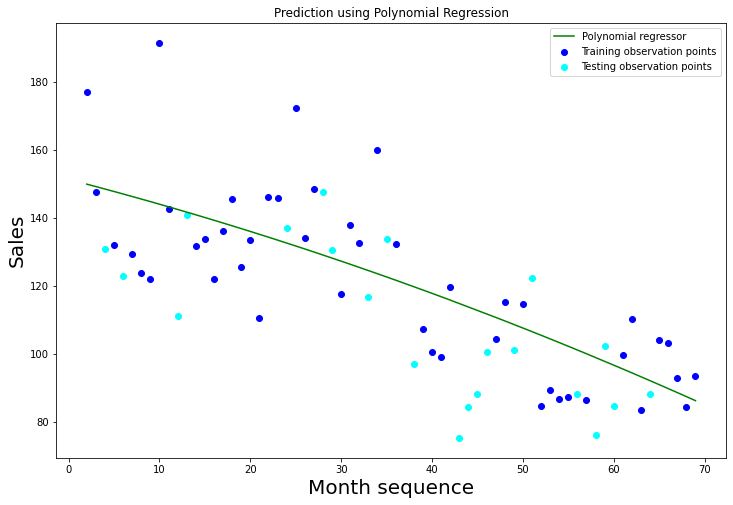

Polynomial Regression: [[82.59]] (Accuracy: 58%)


In [40]:
# POLYNOMIAL REGRESSION
polynomialResult = predictPolynomialRegression(X_train, y_train, X_test, y_test)
polynomial_regressor = polynomialResult['regressor']
regValues['Polynomial'] = round(polynomialResult['values'][0][0])

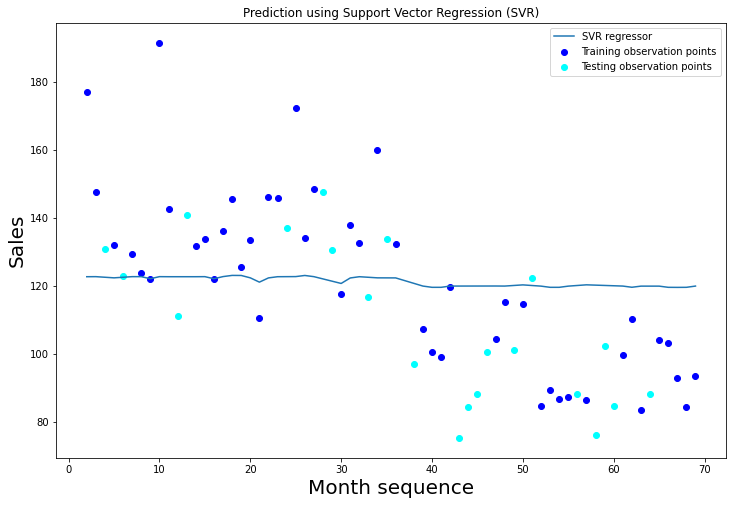

Support Vector Regression (SVR): [121.33] (Accuracy: 9%)


In [41]:
# SIMPLE VECTOR REGRESSION (SVR)
svrResult = predictSVR(X_train, y_train, X_test, y_test)
svr_regressor = svrResult['regressor']
regValues['SVR'] = round(svrResult['values'][0])

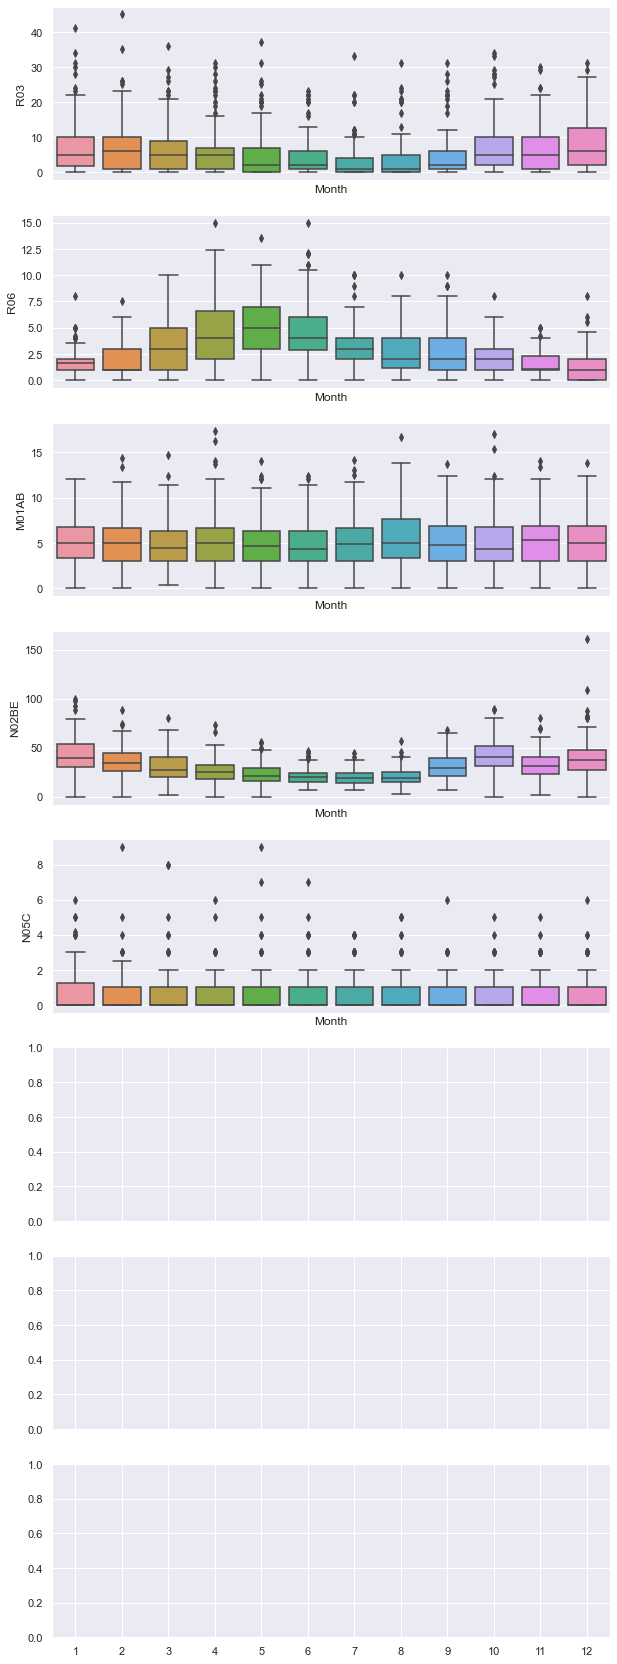

In [60]:
import seaborn as sns
dfatc_daily = pd.read_csv('C:/Users/Admin/Downloads/in/salesdaily.csv')
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['R03','R06','M01AB','N02BE', 'N05C'], axes):
    sns.boxplot(data=dfatc_daily, x='Month', y=name, ax=ax)

In [61]:
df=pd.read_csv('C:/Users/Admin/Downloads/in/salesdaily.csv')
from statsmodels.tsa.stattools import adfuller

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -8.669
P-value = 0.000
Critical values :
	1%: -3.9631060717799924 - The data is  stationary with 99% confidence
	5%: -3.41259173685078 - The data is  stationary with 95% confidence
	10%: -3.1282874376905356 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -7.471
P-value = 0.000
Critical values :
	1%: -3.9631206583322434 - The data is  stationary with 99% confidence
	5%: -3.4125988034261017 - The data is  stationary with 95% confidence
	10%: -3.128291597193074 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -7.829
P-value = 0.000
Critical values :
	1%: -3.9631123111656277 - The data is  stationary with 99% confidence
	5%: -3.412594759575526 - The data is  stationary with 95% confidence
	10%: -3.1282892169169547 - The data is  stationary with 90% confidence
ADF test for N02BE
----------------------

In [64]:
df = pd.read_csv('C:/Users/Admin/Downloads/in/salesmonthly.csv')    
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    print(x + ': ' + str(ApEn(df[x].values, m=2, r=0.2*np.std(df[x].values))))

M01AB: 0.5893983583885993
M01AE: 0.7448566398818222
N02BA: 0.6121630386995687
N02BE: 0.5743235328896188
N05B: 0.6849623624662486
N05C: 0.382530748050697
R03: 0.44041794673092216
R06: 0.4869970603922926
